# Assignment 2: Hypothesis Testing

*Due*: Wed, Nov 13, 2019 in class

*Submission*: Complete this notebook and print out the output or electronically submit it. 

Everything you need to complete is marked with a TODO. For textual questions create a new cell under the question to respond to it.


## Motivation
In a standard randomized control trial, our null hypothesis is often trivial---nothing happens, no difference in the mean, no difference in the relative ranking. In this assignment, we look to generalize this idea to compare observed data against an assumed statistical model. That is, could the observed data plausibly be generated from the known model.


An air shower is a cascade of ionized particles and electromagnetic radiation produced in the atmosphere when a primary cosmic ray (i.e. one of extraterrestrial origin) enters the atmosphere. When a particle, which could be a proton, a nucleus, an electron, a photon, or (rarely) a positron, strikes an atom's nucleus in the air it produces many energetic hadrons. We have a detector that observes particles that reach a ground station and measures the particle energy and arrival time.

## Model and Data
We have the following theoretical model to describe particle behavior. The energy of each particle is drawn independent of arrival time from a [Gamma Distribution](https://en.wikipedia.org/wiki/Gamma_distribution). The particles arrive as a [Poisson process](https://en.wikipedia.org/wiki/Poisson_point_process). We have the following simulator:

In [133]:
import numpy as np
import pandas as pd

def simulate_burst(total):
    """Simulates a trial of total # of particles returns
       a dataframe with two columns one with observed time (in microsecs)
       and one with the energy in kilojoules.
    """
    t = 0
    data = []
    for trial in range(total):
        t += np.random.exponential(scale=1.0)
        obs = np.random.gamma(2.15,1.96, 1)[0]
        
        data.append({'otime_us':t, 'energy_kj':obs})
    
    return pd.DataFrame(data)

In addition to the simulator, you are given a daset of real observations [download](https://raw.githubusercontent.com/sjyk/cmsc21800/master/part.csv). You will write a function to load this dataset into a pandas dataframe. The dataset contains some missing values, the function should drop all rows with any missing values (i.e., NaN)

In [143]:
def load_data(filename):
    """TODO
       
       Input: a csv file of airburst observations
       Output: a pandas dataframe with no NaNs
    """
    df = pd.read_csv(filename, skiprows=1, sep=' ', names=['otime_us', 'energy_kj'])
    df.dropna(inplace=True)
    return df

In [ ]:
df = load_data("particles.csv")

## Pre-Processing

Before, we begin testing, we show analyze the data for potential problems.

Q1. TODO *Compare particle energies generated from the simulator and the real data. If they do differ, explain how.*

In [134]:
df_sim = simulate_burst(len(df))

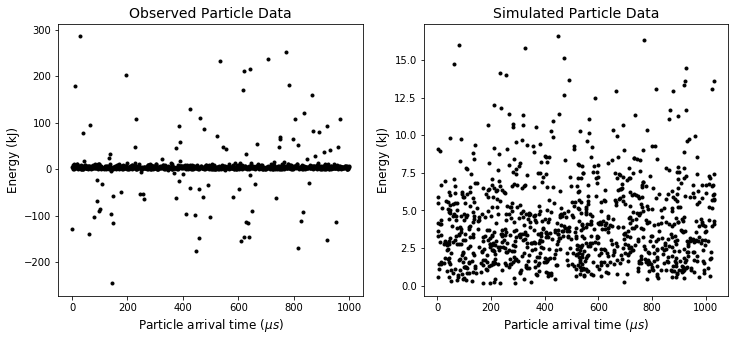

In [171]:
#Code for Q1
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
plt.title("Observed Particle Data", fontsize=14)
plt.plot(df['otime_us'], df['energy_kj'], 'k.')
plt.xlabel("Particle arrival time ($\mu s$)", fontsize=12)
plt.ylabel("Energy (kJ)", fontsize=12)

fig.add_subplot(1, 2, 2)
plt.title("Simulated Particle Data", fontsize=14)
plt.plot(df_sim['otime_us'], df_sim['energy_kj'], 'k.')
plt.xlabel("Particle arrival time ($\mu s$)", fontsize=12)
plt.ylabel("Energy (kJ)", fontsize=12)
plt.show()
#print(df_sim.head())

The data seems to differ since there are extremely large positive and negative values for the observed particle data (energies range from approximately -300 to 300 kJ) which do not appear in the simulated data (energies range from approximately 0 to 17 kJ). Also, the simulated data have only positive values whereas the observed data contain negative values.  

Q2. TODO *Your engineers tell you that all energy readings should be positive. Are there any negative values in either of the datasets? If so, is there any unexpected pattern to those values in terms of times they occur or values they take on?*

In [ ]:
#Code for Q2
outliers_total = df[(df['energy_kj'] > 17.) | (df['energy_kj'] < 0.)] # finding outliers

# attempting to see if the outliers follow a normal distribution
samples = np.random.normal(np.mean(outliers_total['energy_kj']), np.std(outliers_total['energy_kj']), size=len(outliers_total))
print(samples)

In [170]:
print(np.mean(outliers_total['energy_kj']))
print(np.std(outliers_total['energy_kj']))

6.632118019204102
108.54612079475939


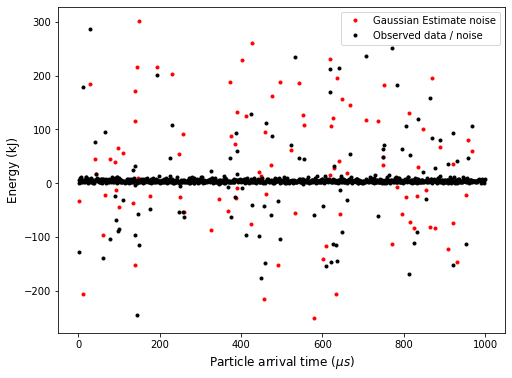

In [167]:
# from this plot it looks like the outliers are normally distributed (white noise)
plt.figure(figsize=(8, 6))
plt.plot(outliers_total['otime_us'], samples, 'r.', label='Gaussian Estimate noise')
plt.plot(df['otime_us'], df['energy_kj'], 'k.', label='Observed data / noise')
plt.xlabel("Particle arrival time ($\mu s$)", fontsize=12)
plt.ylabel("Energy (kJ)", fontsize=12)
plt.legend()
plt.show()

Yes, there are negative values in the observed particle data.
outlier data might sampled from normal distribution, white noise????

Q3. TODO *Are there any other energy readings that are suspect in the real dataset? Roughly what fraction of values are suspect*

In [25]:
#Code for Q3

Based on your answers to Q1, Q2, Q3, write a function that cleans the real data by removing all problematic observations. 

In [27]:
def clean(df):
    """TODO
    
       Input: a dataframe of a mix of erroneous and correct observations 
       Output: a dataframe with only the correct observations
    """
    
    raise ValueError("NotImplemented: You must implement clean(df)")

## Comparing the Energies
Now, we will compare the particle energies from the simulated data and the real data. Fill in the following hypothesis tests. *Be reasonable about this* You may not import methods from statistics packages that perform the test for you.

In [30]:
def z_test_energy(simulated, real):
    """TODO
    
       Input: a dataframe of simulated observations, a dataframe of real observations 
       Output: a p-value based on the two-sample z-test
    """
    
    raise ValueError("NotImplemented: You must implement z_test_energy")

    
def rs_test_energy(simulated, real):
    """TODO
    
       Input: a dataframe of simulated observations, a dataframe of real observations 
       Output: a p-value based on the two-sample rank-sum test using the normal approximation
    """
    
    raise ValueError("NotImplemented: You must implement rs_test_energy")


#get the data
simulate_data = simulate_burst(10000)
real_data =  clean(load_data('part.csv'))
print('Two-Sample Z-Test: ', z_test_energy(simulated, real))
print('Rank Sum Test: ', rs_test_energy(simulated, real))

ValueError: NotImplemented: You must implement load_data(filename)

There are a few parameters here that we selected: (1) how much data to simulate, and (2) we cleaned the real dataset prior to testing. Evaluate the effects of these choices.

Q1. TODO *Would it be beneficial to simulate 1e6 data points rather than the 10000 used above, why or why not?*

In [ ]:
#Code for Q1

Q2. TODO *Do the p-values change if you did not clean the dataset? Are both tests equally sensitive to the dirty data?*

In [ ]:
#Code for Q2

## Comparing the Arrival Times
So far, we have only tested the particle energies. Another important aspect of our model is the arrival process (i.e., the times). 

Q1. TODO *Describe a hypothesis test that evaluates whether the arrival process significantly differs in the simulator from the observed data.*

Q2. TODO *Do your pre-processing choice above change? Why or why not?*

In [ ]:
def test_arrival_process(simulated, real):
    """TODO
    
       Input: a dataframe of simulated observations, a dataframe of real observations 
       Output: a p-value that determines the difference between the arrival processes
    """
    
    raise ValueError("NotImplemented: You must implement rs_test_energy")